<a href="https://colab.research.google.com/github/thiagoteles10/EDA-sobre-houses-ocean-proximity/blob/main/EDA_sobre_houses_ocean_proximity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#CARREGANDO BBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msg

import seaborn as sns


In [25]:
# LENDO ARQUIVO CSV
houses = pd.read_csv('housing.csv')

In [26]:
# VERIFICANDO AS PRIMEIRAS LINHAS DO DATASET
houses.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [27]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


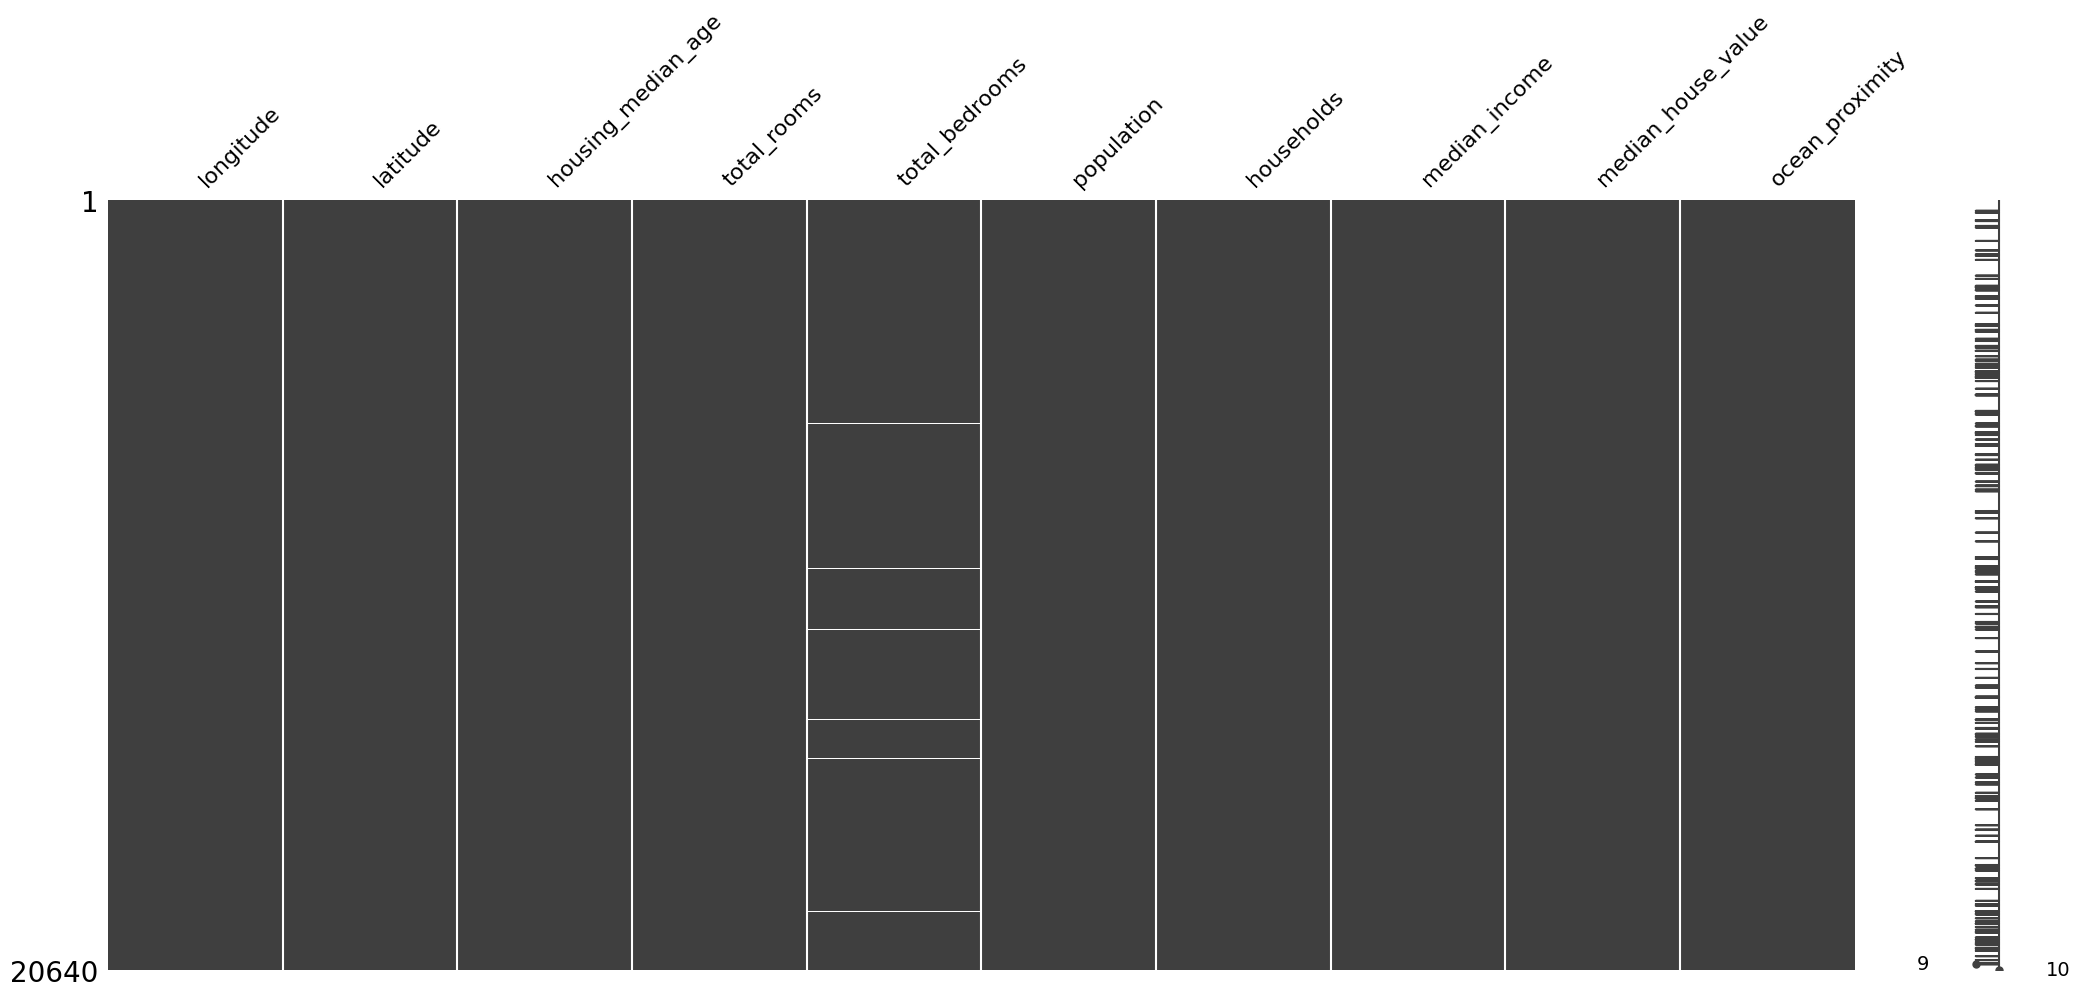

In [28]:
# PLOTANDO A VISUALIZAÇÃO DE DADOS FALTANTES
_= msg.matrix(houses)

Podemos ver que a coluna 'total_bedroons' possui dados faltantes

In [29]:
# VERIFICANDO O TOTAL DE DADOS FALTANTES NA COLUNA 'total_bedrooms'
houses.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [30]:
# ELIMINADO AS LINHAS COM DADOS FALTANTES
houses = houses.dropna(axis=0)

In [31]:
# VERIFICANDO SE HÁ DADOS DUPLICADOS
duplicados = houses.duplicated().sum()
print(duplicados)

0


In [32]:
# VERIFICANDO AS INFORMAÇÕES ESTATÍSTICAS DO DATASET
houses.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [34]:
# CRIA A COLUNA OCEAN PROXIMITY
houses_1h_ocean = houses[houses['ocean_proximity'] == '<1H OCEAN']
houses_inland = houses[houses['ocean_proximity'] == 'INLAND']
houses_near_ocean = houses[houses['ocean_proximity'] == 'NEAR OCEAN ']
houses_near_bay = houses[houses['ocean_proximity'] == 'NEAR BAY']
houses_island = houses[houses['ocean_proximity'] == 'ISLAND']

In [43]:
houses['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

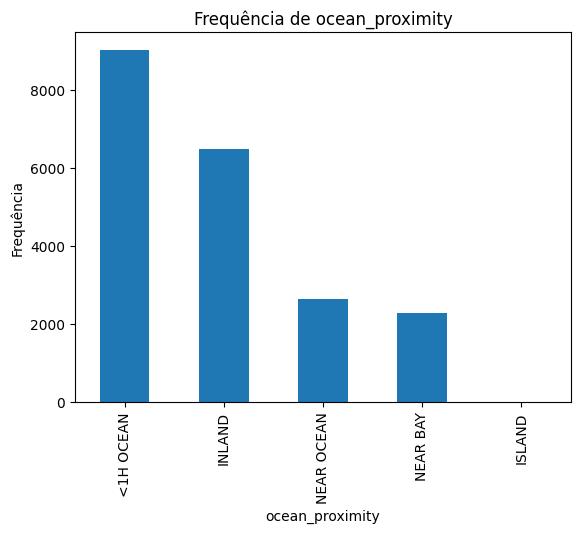

In [33]:
# Define o título e os rótulos dos eixos
_= houses['ocean_proximity'].value_counts().plot(kind='bar')
_= plt.title('Frequência de ocean_proximity')
_= plt.xlabel('ocean_proximity')
_= plt.ylabel('Frequência')

In [35]:
# NÚMERO DE FAMÍLIAS DE ACORDO COM A PROXIMIDADE DO OCEANO
houses.groupby('ocean_proximity')['households'].mean().sort_values(ascending=False)

ocean_proximity
<1H OCEAN     517.419083
NEAR OCEAN    501.528919
NEAR BAY      487.236123
INLAND        478.006927
ISLAND        276.600000
Name: households, dtype: float64

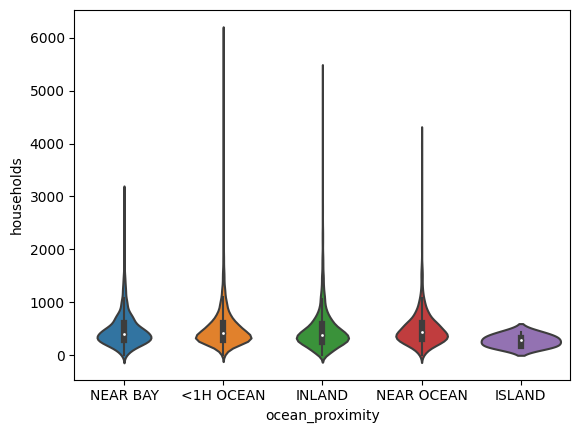

In [36]:
# GRÁFICO VIOLIN PLOT DO NÚMERO DE FAMÍLIAS DE ACORDO COM A PROXIMIDADE DO OCEANO.
_= sns.violinplot(x=houses.ocean_proximity, y=houses.households)

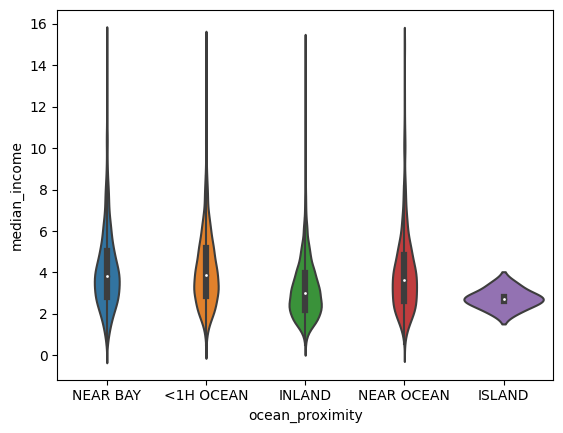

In [37]:
# PLOTANDO UM VIOLINPLOT DE OCEAN_PROXIMITY X MEDIAN_INCOME

_= sns.violinplot(x=houses.ocean_proximity, y=houses.median_income)

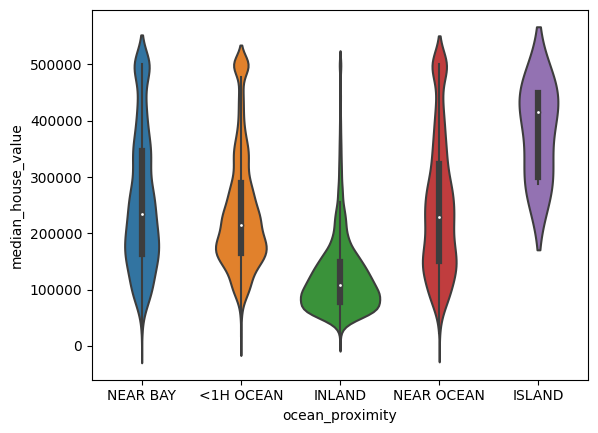

In [38]:
# VALORES MÉDIOS DAS CASAS DE ACORDO COM A PROXIMIDADE DO OCEANO.
_= sns.violinplot(x=houses.ocean_proximity, y=houses.median_house_value)

In [39]:
# CRIANDO UM GRÁFICO DE DISPERSÃO EM UM MAPA USANDO O PLOTLY EXPRESS
import plotly.express as px
import pandas as pd



# Create a scatter plot on a map using Plotly Express
fig = px.scatter_mapbox(houses, lat='latitude', lon='longitude',
                        hover_name='ocean_proximity',
                        color='median_house_value',
                        size='population',
                        zoom=4, height=600)

# Update the map style
fig.update_layout(mapbox_style='open-street-map')

# Show the plot
fig.show()

Vemos pelo gráfico de dispersão acima, vemos que tanto os preços dos imóveis quanto a população, tendem a aumentar de acordo com a proximidade da região litorânea.

In [40]:
houses.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

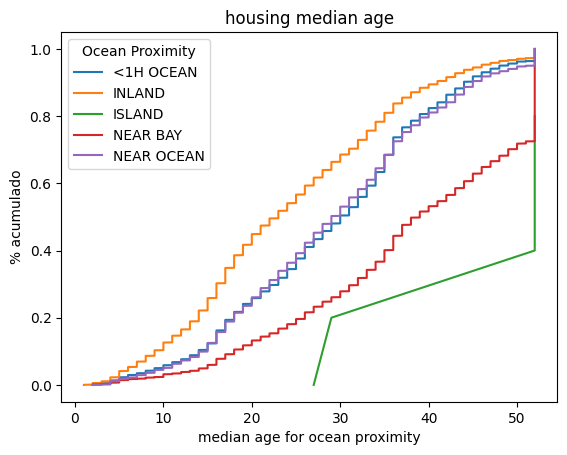

In [41]:
# PLOTANDO UM GRÁFICO DE DISTRIBUIÇÃO ACUMULADA DA 'housing_median_age'

# CRIANDO UM AGRUPAMENTO PARA 'ocean_proximity'
groups = houses.groupby('ocean_proximity')

# FAZENDO UM LOOP PARA PASSAR PELOS GRUPOS

for name, group in groups:
  x = np.sort(group['housing_median_age'])
  y= np.arange(len(group)) / float(len(group))
  plt.plot(x,y,label=name)

# AJUSTANDO OS RÓTULOS E TÍTULOS

plt.title('housing median age')
plt.ylabel('% acumulado')
plt.xlabel('median age for ocean proximity')

# ADICIONANDO LEGENDA

plt.legend(title='Ocean Proximity')

plt.show()

### Gráfico de distribuição acumulada, é um tipo de gráfico que mostra a distribuição cumulativa de uma variável. Em outras palavras, ele mostra a proporção ou a porcentagem de valores da variável que estão abaixo de um determinado valor. No exemplo acima, podemos ver que as casas com proximity '< 1h oecan ' temos 40% desses imóveis abaixo de 30 anos.

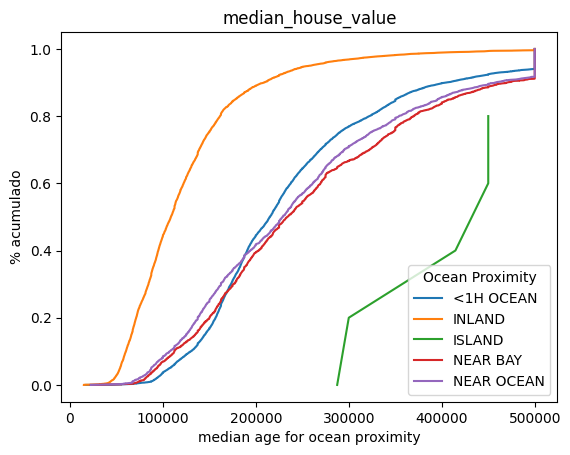

In [42]:
# PLOTANDO UM GRÁFICO DE DISTRIBUIÇÃO ACUMULADA DA 'median_house_value'

# CRIANDO UM AGRUPAMENTO PARA 'ocean_proximity'
groups = houses.groupby('ocean_proximity')

# FAZENDO UM LOOP PARA PASSAR PELOS GRUPOS

for name, group in groups:
  x = np.sort(group['median_house_value'])
  y= np.arange(len(group)) / float(len(group))
  plt.plot(x,y,label=name)

# AJUSTANDO OS RÓTULOS E TÍTULOS

plt.title('median_house_value')
plt.ylabel('% acumulado')
plt.xlabel('median age for ocean proximity')

# ADICIONANDO LEGENDA

plt.legend(title='Ocean Proximity')

plt.show()

Podemos ver no gráfico acima que (NEAR OCEAN, NEAR BAY,<1H OCEAN) tem valores bem aproximados. O gráfico nos mostra perfeitamente que para esses 3 valores de proximity citados acima, 60% dos valores estão abaixo de 300.000. enquanto para 'INLAND', 60% estão abaixo de 150.000.